In [15]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal.windows import gaussian
from scipy.ndimage import gaussian_filter

In [2]:
y, sr = librosa.load(librosa.example("libri1"), sr=None)

In [11]:
suby = y[2000:6000]

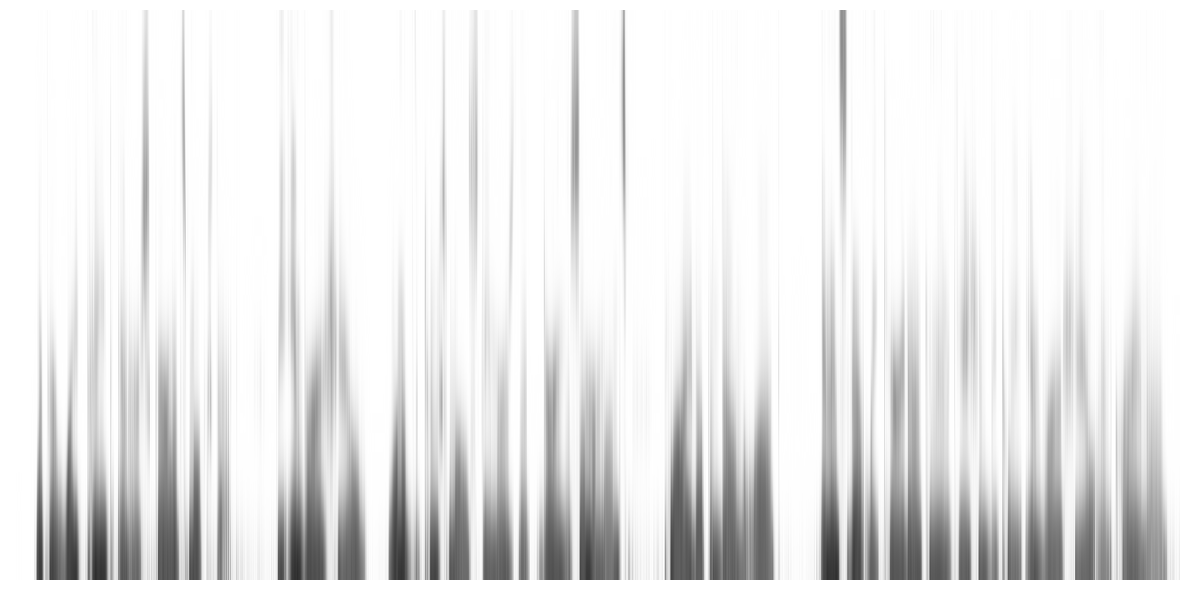

In [16]:
window_length = int(0.005 * sr)  # ~5 ms window length
hop_length = int(0.00025 * sr)  # ~0.25 ms hop length for high temporal resolution
n_fft = int(2 ** np.ceil(np.log2(window_length)))  # FFT size covering window length

# Generate Gaussian window
from scipy.signal.windows import gaussian
gaussian_window = gaussian(window_length, std=window_length / 6)

# Compute STFT with Gaussian window
D = librosa.stft(y, n_fft=n_fft, hop_length=hop_length, win_length=window_length, window=gaussian_window)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Apply dynamic range cutoff
dynamic_range = 50  # Praat's default dynamic range
S_db = np.clip(S_db, a_min=S_db.max() - dynamic_range, a_max=None)

# Smooth the spectrogram with a Gaussian filter
S_db_smoothed = gaussian_filter(S_db, sigma=[2, 2])  # Smoothing in both time and frequency dimensions

# Frequency range (e.g., 0 to 5000 Hz for speech analysis)
max_freq = 5000  # in Hz
max_bin = int(max_freq / (sr / n_fft))

# Plot in grayscale
plt.figure(figsize=(12, 6))
plt.imshow(
    S_db_smoothed[:max_bin, :], aspect="auto", origin="lower", cmap="Greys",
    extent=[0, len(y) / sr, 0, max_freq], interpolation="spline36"  # High-quality interpolation
)
plt.axis("off")  # Hide axes for Praat-like minimalism
plt.tight_layout()
plt.show()